<a href="https://colab.research.google.com/github/aduganisaicharan/cataract_dectection/blob/main/cataract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random
import os
for dirname, _, filenames in os.walk('D:\archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv("/content/drive/MyDrive/full_df.csv")
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


In [3]:
def has_cataract(text):
  if "cataract" in text:
    return 1;
  else:
    return 0;

In [4]:
df["left_cataract"]=df["Left-Diagnostic Keywords"].apply(lambda x:has_cataract(x))
df["right_cataract"]=df["Right-Diagnostic Keywords"].apply(lambda x:has_cataract(x))

In [5]:
left_cataract = df.loc[(df.C == 1 )& (df.left_cataract == 1)]["Left-Fundus"].values
right_cataract = df.loc[(df.C == 1) & (df.right_cataract ==1)]["Right-Fundus"].values

In [6]:
left_cataract[:10]
right_cataract[:10]

array(['24_right.jpg', '81_right.jpg', '112_right.jpg', '188_right.jpg',
       '218_right.jpg', '345_right.jpg', '354_right.jpg', '477_right.jpg',
       '553_right.jpg', '560_right.jpg'], dtype=object)

In [7]:
print("Number of images in left cataract: {}".format(len(left_cataract)))
print("Number of images in right cataract: {}".format(len(right_cataract)))

Number of images in left cataract: 304
Number of images in right cataract: 290


In [8]:
left_normal = df.loc[(df.C==0) & (df["Left-Diagnostic Keywords"]=="normal fundus")]["Left-Fundus"].sample(250,random_state=42).values
right_normal = df.loc[(df.C==0) & (df["Right-Diagnostic Keywords"]=="normal fundus")]["Right-Fundus"].sample(250,random_state=42).values



In [9]:
left_normal[:15]

array(['3332_left.jpg', '4059_left.jpg', '69_left.jpg', '2415_left.jpg',
       '4176_left.jpg', '2711_left.jpg', '4614_left.jpg', '3174_left.jpg',
       '2862_left.jpg', '2424_left.jpg', '3193_left.jpg', '3306_left.jpg',
       '2961_left.jpg', '2425_left.jpg', '2858_left.jpg'], dtype=object)

In [10]:
right_normal[:15]

array(['2964_right.jpg', '680_right.jpg', '500_right.jpg',
       '2368_right.jpg', '2820_right.jpg', '2769_right.jpg',
       '2696_right.jpg', '2890_right.jpg', '940_right.jpg',
       '2553_right.jpg', '3371_right.jpg', '3042_right.jpg',
       '919_right.jpg', '3427_right.jpg', '379_right.jpg'], dtype=object)

In [11]:
cataract = np.concatenate((left_cataract,right_cataract),axis=0)
normal = np.concatenate((left_normal,right_normal),axis=0)
print(len(cataract),len(normal))


594 500


In [12]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
dataset_dir = "/content/drive/MyDrive/preprocessed_images"
image_size=224
labels = []
dataset = []
# new_dataset = []
def create_dataset(image_category,label):
    for img in tqdm(image_category):
        image_path = os.path.join(dataset_dir,img)
        try:
            image = cv2.imread(image_path,cv2.IMREAD_COLOR)
            image = cv2.resize(image,(image_size,image_size))
        except:
            continue

        dataset.append([np.array(image),np.array(label)])
    random.shuffle(dataset)
    return dataset


In [13]:
# if(img == "410_left.jpg" or img=="254_right.jpg"):
        #   # new_data = np.concatenate(img)
        #   new_imagepath=os.path.join(dataset_dir,img)
        #   try:
        #       new_image=cv2.imread(new_imagepath,cv2.IMREAD_COLOR)
        #       new_image = cv2.resize(new_image,(image_size,image_size))
        #   except:
        #       continue
        #   new_dataset.append([np.array(new_image),np.array(label)])
        #   print(new_dataset.shape)

In [14]:
dataset = create_dataset(cataract,1)

100%|██████████| 594/594 [04:21<00:00,  2.27it/s]


In [15]:
len(dataset)

588

In [16]:
dataset = create_dataset(normal,0)

100%|██████████| 500/500 [06:49<00:00,  1.22it/s]


In [17]:
len(dataset)

1088

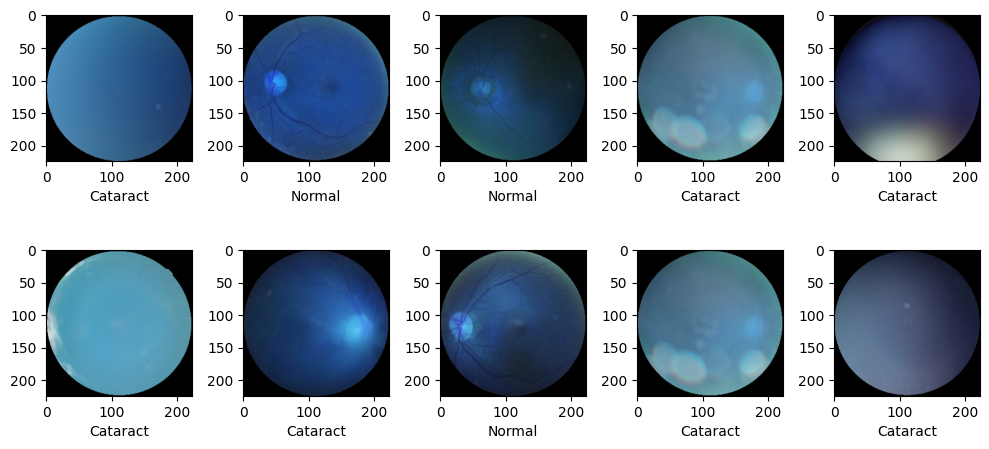

In [18]:
plt.figure(figsize=(10,5))
for i in range(10):
  sample=random.choice(range(len(dataset)))
  image = dataset[sample][0]
  category = dataset[sample][1]
  if category == 0:
    label ="Normal"
  else:
    label = "Cataract"
  plt.subplot(2,5,i+1)
  plt.imshow(image)
  plt.xlabel(label)
plt.tight_layout()

In [19]:
x = np.array([i[0] for i in dataset]).reshape(-1,image_size,image_size,3)
y = np.array([i[1] for i in dataset])

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [21]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg=VGG19(weights="imagenet",include_top=False,input_shape=(image_size,image_size,3))

80134624/80134624 [==============================] - 4s 0us/step


In [22]:
for layer in vgg.layers:
  layer.trainable = False

In [23]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(1,activation="sigmoid"))

In [24]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1)                 25089     
                                                                 
Total params: 20049473 (76.48 MB)
Trainable params: 25089 (98.00 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [25]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("vgg19.h5",monitor = "val_acc", verbose =1, save_best_only=True, save_weights_only = False, period=1)
earlystop = EarlyStopping(monitor = "val_acc",patience = 5, verbose=1)

In [27]:
history = model.fit(x_train,y_train,batch_size=32,epochs=15,validation_data=(x_test,y_test),verbose=1,callbacks=[checkpoint,earlystop ])

Epoch 1/15
28/28 [==============================] - ETA: 0s - loss: 2.9596 - accuracy: 0.8356

28/28 [==============================] - 26s 613ms/step - loss: 2.9596 - accuracy: 0.8356 - val_loss: 2.0425 - val_accuracy: 0.9083
Epoch 2/15
28/28 [==============================] - ETA: 0s - loss: 0.7669 - accuracy: 0.9552

28/28 [==============================] - 5s 184ms/step - loss: 0.7669 - accuracy: 0.9552 - val_loss: 0.8165 - val_accuracy: 0.9220
Epoch 3/15
28/28 [==============================] - ETA: 0s - loss: 0.1279 - accuracy: 0.9782

28/28 [==============================] - 5s 195ms/step - loss: 0.1279 - accuracy: 0.9782 - val_loss: 0.6111 - val_accuracy: 0.9495
Epoch 4/15
28/28 [==============================] - ETA: 0s - loss: 0.0691 - accuracy: 0.9943

28/28 [==============================] - 5s 195ms/step - loss: 0.0691 - accuracy: 0.9943 - val_loss: 0.6766 - val_accuracy: 0.9450
Epoch 5/15
28/28 [==============================] - ETA: 0s - loss: 0.0108 - accuracy: 0.9977

28/28 [==============================] - 5s 192ms/step - loss: 0.0108 - accuracy: 0.9977 - val_loss: 0.5518 - val_accuracy: 0.9495
Epoch 6/15
28/28 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 0.9989

28/28 [==============================] - 5s 192ms/step - loss: 0.0017 - accuracy: 0.9989 - val_loss: 0.5080 - val_accuracy: 0.9587
Epoch 7/15
28/28 [==============================] - ETA: 0s - loss: 9.3339e-04 - accuracy: 1.0000

28/28 [==============================] - 6s 202ms/step - loss: 9.3339e-04 - accuracy: 1.0000 - val_loss: 0.5409 - val_accuracy: 0.9541
Epoch 8/15
28/28 [==============================] - ETA: 0s - loss: 5.1935e-04 - accuracy: 1.0000

28/28 [==============================] - 6s 205ms/step - loss: 5.1935e-04 - accuracy: 1.0000 - val_loss: 0.5207 - val_accuracy: 0.9587
Epoch 9/15
28/28 [==============================] - ETA: 0s - loss: 1.6361e-04 - accuracy: 1.0000

28/28 [==============================] - 6s 200ms/step - loss: 1.6361e-04 - accuracy: 1.0000 - val_loss: 0.5052 - val_accuracy: 0.9633
Epoch 10/15
28/28 [==============================] - ETA: 0s - loss: 9.5936e-05 - accuracy: 1.0000

28/28 [==============================] - 6s 203ms/step - loss: 9.5936e-05 - accuracy: 1.0000 - val_loss: 0.5125 - val_accuracy: 0.9633
Epoch 11/15
28/28 [==============================] - ETA: 0s - loss: 7.1349e-05 - accuracy: 1.0000

28/28 [==============================] - 6s 205ms/step - loss: 7.1349e-05 - accuracy: 1.0000 - val_loss: 0.5161 - val_accuracy: 0.9587
Epoch 12/15
28/28 [==============================] - ETA: 0s - loss: 6.5032e-05 - accuracy: 1.0000

28/28 [==============================] - 6s 208ms/step - loss: 6.5032e-05 - accuracy: 1.0000 - val_loss: 0.5169 - val_accuracy: 0.9587
Epoch 13/15
28/28 [==============================] - ETA: 0s - loss: 6.2453e-05 - accuracy: 1.0000

28/28 [==============================] - 6s 213ms/step - loss: 6.2453e-05 - accuracy: 1.0000 - val_loss: 0.5178 - val_accuracy: 0.9587
Epoch 14/15
28/28 [==============================] - ETA: 0s - loss: 5.8671e-05 - accuracy: 1.0000

28/28 [==============================] - 6s 212ms/step - loss: 5.8671e-05 - accuracy: 1.0000 - val_loss: 0.5191 - val_accuracy: 0.9587
Epoch 15/15
28/28 [==============================] - ETA: 0s - loss: 5.6023e-05 - accuracy: 1.0000

28/28 [==============================] - 6s 206ms/step - loss: 5.6023e-05 - accuracy: 1.0000 - val_loss: 0.5201 - val_accuracy: 0.9587


In [28]:
loss,accuracy = model.evaluate(x_test,y_test)
print("loss: ",loss)
print("accuracy: ",accuracy)

7/7 [==============================] - 1s 166ms/step - loss: 0.5201 - accuracy: 0.9587
loss:  0.520075798034668
accuracy:  0.9587156176567078


In [29]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred_prob = model.predict(x_test)

7/7 [==============================] - 1s 166ms/step


In [30]:
y_pred = (y_pred_prob>0.5).astype("int32")

In [31]:
acc=accuracy_score(y_test,y_pred)
con = confusion_matrix(y_test,y_pred)
clf = classification_report(y_test,y_pred)
print(acc)
print()
print(con)
print()
print()
print(clf)
print()

0.9587155963302753

[[ 96   6]
 [  3 113]]


              precision    recall  f1-score   support

           0       0.97      0.94      0.96       102
           1       0.95      0.97      0.96       116

    accuracy                           0.96       218
   macro avg       0.96      0.96      0.96       218
weighted avg       0.96      0.96      0.96       218




(<Figure size 800x600 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

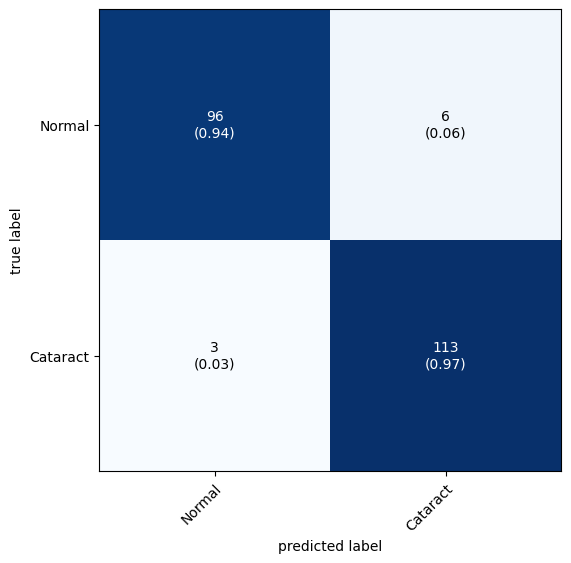

In [32]:

from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cm,figsize =(8,6),class_names=["Normal","Cataract"],show_normed=True)

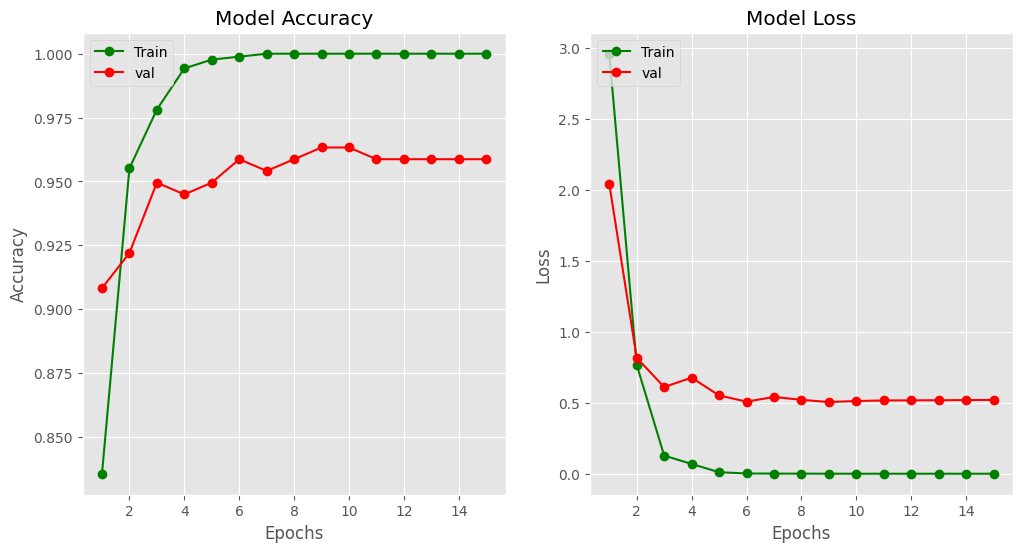

In [33]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,6))
epochs = range(1,16)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],"go-")
plt.plot(epochs,history.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],"go-")
plt.plot(epochs,history.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

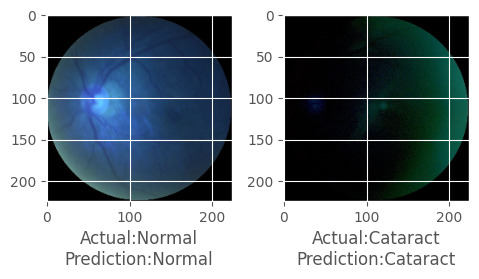

In [37]:
plt.figure(figsize=(12,7))
for i in range(2):
    sample = random.choice(range(len(x_test)))
    image = x_test[sample]
    category = y_test[sample]
    pred_category = y_pred[sample]

    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"

    if pred_category== 0:
        pred_label = "Normal"
    else:
        pred_label = "Cataract"
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel("Actual:{}\nPrediction:{}".format(label,pred_label))
plt.tight_layout()


In [38]:
def preprocess_external_image(image_path, image_size):
    image = load_img(image_path, target_size=(image_size, image_size))
    image = img_to_array(image)
    image = image / 255.0
    image = np.expand_dims(image, axis=0)
    return image
external_image_path = "/content/3507_left.jpg"
preprocessed_image = preprocess_external_image(external_image_path, image_size)
prediction = model.predict(preprocessed_image)
if prediction > 0.5:
    print("image shows signs of Cataract.")
else:
    print("image is Normal.")

1/1 [==============================] - 1s 1s/step
image shows signs of Cataract.
